## Análisis del log de tiempos del servidor.

Este notebook es un mínimo análisis sobre la respuesta en tiempos del servidor. En el mismo se muestra la evolución del tiempo promedio del ciclo de juego durante una partida, el tiempo procesando eventos y el tiempo tomado en el procesamiento de distintos eventos.

Para obtener el log de tiempos el servidor debe estar compilado con el logging de tiempos activo. Debe guardarse la salida a un archivo en la carpeta `build` con nombre `log-servidor.txt`.

Ejemplo de ejecución para generar el archivo necesario:
```bash
~/tp-final-taller-1/build $ ./servidor | tee log-servidor.txt
```

Hecho esto se generará un archivo `log-servidor.txt` listo para analizar con este notebook

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [19]:
s = []
with open('./build/log-servidor.txt') as f:
    s = f.readlines()

s[:10]

['s] avg(actualizacion): 3.66ms\n',
 's] avg(eventos): 15.2ms\n',
 's] avg(iter): 19.14ms\n',
 '[1019ms] avg(actualizacion): 3.70588ms\n',
 '[1020ms] avg(eventos): 15.1569ms\n',
 '[1020ms] avg(iter): 19.4118ms\n',
 '[2039ms] avg(actualizacion): 3.60784ms\n',
 '[2040ms] avg(eventos): 15.1176ms\n',
 '[2040ms] avg(iter): 19.4118ms\n',
 '[3060ms] avg(actualizacion): 3.70588ms\n']

In [20]:
regex = re.compile('\[(\d+)ms\] (\w+)\((\w+)\)(?:: | = )(\d+.\d+|\d+)ms')

In [21]:
matched = []
for linea in s:
    m = regex.match(linea)
    if m:
        matched.append(m.groups())

In [22]:
df = pd.DataFrame(matched, columns=['timestamp', 'clase', 'detalle', 'tiempo'])

In [23]:
df['detalle'].unique()

array(['actualizacion', 'eventos', 'iter', 'iniciar_entrenamiento_tropa',
       'iniciar_construccion_edificio', 'mover_tropas', 'atacar_tropa'], dtype=object)

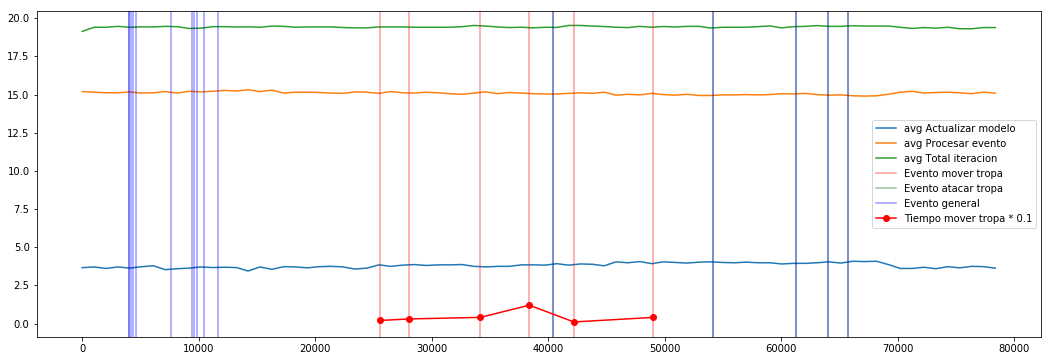

In [26]:
plt.figure(figsize=(18, 6))
data = df[(df['clase'] == 'avg') & (df['detalle'] == 'actualizacion')]
ax_actualizacion, = plt.plot(np.array(data['timestamp'].astype('int')), np.array(data['tiempo'].astype('float')))
#plt.title("Tiempo tomado por modelo->actualizar(dt)");

data = df[(df['clase'] == 'avg') & (df['detalle'] == 'eventos')]
ax_eventos, = plt.plot(np.array(data['timestamp'].astype('int')), np.array(data['tiempo'].astype('float')))
#plt.title("Tiempo tomado por modelo->actualizar(dt)");

data = df[(df['clase'] == 'avg') & (df['detalle'] == 'iter')]
ax_iteracion, = plt.plot(np.array(data['timestamp'].astype('int')), np.array(data['tiempo'].astype('float')))

global ax_ev_mt
global ax_ev_at
global ax_ev_nmt

ax_ev_at = None

def func(x, color):
    global ax_ev_at
    global ax_ev_mt
    global ax_ev_nmt
    if color == 'red':
        ax_ev_mt = plt.axvline(x = float(x), color=color, alpha=0.4)
    elif color == 'darkgreen':
        ax_ev_at = plt.axvline(x = float(x), color=color, alpha=0.4)
    else:
        ax_ev_nmt = plt.axvline(x = float(x), color=color, alpha=0.4)


df[(df['clase'] == 't') & (df['detalle'] == 'mover_tropas')]['timestamp'].map(lambda x: func(x, 'red'));
df[(df['clase'] == 't') & (df['detalle'] == 'atacar_tropa')]['timestamp'].map(lambda x: func(x, 'darkgreen'));
df[(df['clase'] == 't') & (df['detalle'] != 'mover_tropas') & (df['detalle'] != 'atacar_tropas')]['timestamp'].map(lambda x: func(x, 'blue'));


data = df[(df['clase'] == 't') & (df['detalle'] == 'mover_tropas')]
ax_mover_tropas, = plt.plot(np.array(data['timestamp'].astype('int')), np.array(data['tiempo'].astype('float')) / 10, color='red', marker='o');

plt.legend([ax_actualizacion, ax_eventos, ax_iteracion, ax_ev_mt, ax_ev_at, ax_ev_nmt, ax_mover_tropas],
          ["avg Actualizar modelo", "avg Procesar evento", "avg Total iteracion", "Evento mover tropa", "Evento atacar tropa", "Evento general", "Tiempo mover tropa * 0.1"]);

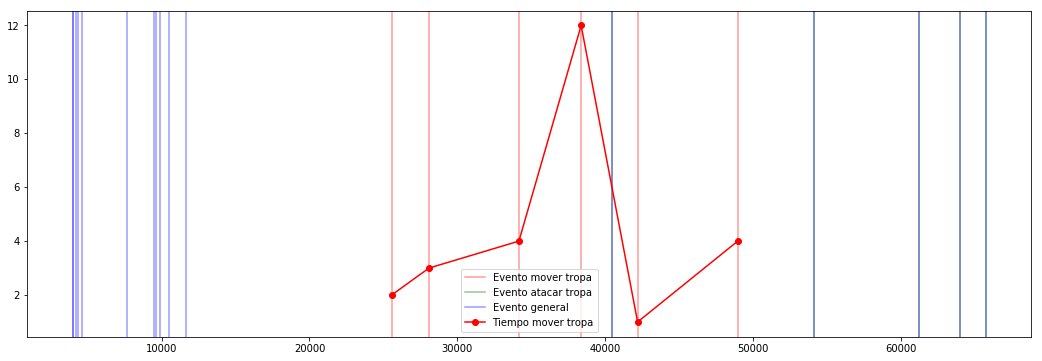

In [29]:
plt.figure(figsize=(18, 6))
global ax_ev_mt
global ax_ev_at
global ax_ev_nmt

ax_ev_at = None

def func(x, color):
    global ax_ev_at
    global ax_ev_mt
    global ax_ev_nmt
    if color == 'red':
        ax_ev_mt = plt.axvline(x = float(x), color=color, alpha=0.4)
    elif color == 'darkgreen':
        ax_ev_at = plt.axvline(x = float(x), color=color, alpha=0.4)
    else:
        ax_ev_nmt = plt.axvline(x = float(x), color=color, alpha=0.4)


df[(df['clase'] == 't') & (df['detalle'] == 'mover_tropas')]['timestamp'].map(lambda x: func(x, 'red'));
df[(df['clase'] == 't') & (df['detalle'] == 'atacar_tropa')]['timestamp'].map(lambda x: func(x, 'darkgreen'));
df[(df['clase'] == 't') & (df['detalle'] != 'mover_tropas') & (df['detalle'] != 'atacar_tropas')]['timestamp'].map(lambda x: func(x, 'blue'));


data = df[(df['clase'] == 't') & (df['detalle'] == 'mover_tropas')]
ax_mover_tropas, = plt.plot(np.array(data['timestamp'].astype('int')), np.array(data['tiempo'].astype('float')), color='red', marker='o');

plt.legend([ax_ev_mt, ax_ev_at, ax_ev_nmt, ax_mover_tropas],
          ["Evento mover tropa", "Evento atacar tropa", "Evento general", "Tiempo mover tropa"]);